In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from HARK.utilities import make_figs

from estimark.agents import (
    BequestWarmGlowLifeCyclePortfolioType,
    PortfolioLifeCycleConsumerType,
    WealthPortfolioLifeCycleConsumerType,
)
from estimark.estimation import prepare_model
from estimark.scf import scf_data
from estimark.snp import snp_data_full

# results_dir = "../../docs/tables/TRP/"  # This is AEL's
results_dir = "../estimark/docs/tables/min/" # This is MNW's

In [2]:
csv_file_path = results_dir + "PortfolioW_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [3]:
portfolio_agent, emp_moments, weights, obj_func_portfolio, sim_func_portfolio, plot_portfolio = prepare_model("Portfolio", ["CRRA"])
portfolio_est_params = [float(res["CRRA"])]
print("CRRA", portfolio_est_params[0])

CRRA 9.411025434730309


In [4]:
csv_file_path = results_dir + "WarmGlowPortfolioW_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [5]:
warmglow_agent, emp_moments, weights, obj_func_warmglow, sim_func_warmglow, plot_warmglow = prepare_model("WarmGlowPortfolio", ["CRRA", "BeqMPC", "BeqInt"])
warmglow_est_params = [float(res["CRRA"]), float(res["BeqMPC"]), float(res["BeqInt"])]
print("CRRA", warmglow_est_params[0])
print("BeqMPC", warmglow_est_params[1])
print("BeqInt", warmglow_est_params[2])

CRRA 4.6137827187437095
BeqMPC 0.11037621744378855
BeqInt 0.3262346881753758


In [6]:
csv_file_path = results_dir + "WealthPortfolioW_estimate_results.csv"
res = pd.read_csv(csv_file_path, header=None)
res = res.set_index(res.columns[0])[res.columns[1]].to_dict()

In [7]:
trp_agent, emp_moments, weights, obj_func_trp, sim_func_trp, plot_trp = prepare_model("WealthPortfolio", ["CRRA", "WealthShare"])
trp_est_params = [float(res["CRRA"]), float(res["WealthShare"])]
print("CRRA", trp_est_params[0])
print("WealthShare", trp_est_params[1])

CRRA 5.177187593243714
WealthShare 0.2542334348006456


In [8]:
agents = [portfolio_agent, warmglow_agent, trp_agent]

In [9]:
port_sim_moments = sim_func_portfolio(portfolio_est_params)
warmglow_sim_moments = sim_func_warmglow(warmglow_est_params)
trp_sim_moments = sim_func_trp(trp_est_params)

In [10]:
def convert_wealth_moments_to_vec(dict_in):
    vec_out = np.array([
        dict_in["(25,30]"],
        dict_in["(30,35]"],
        dict_in["(35,40]"],
        dict_in["(40,45]"],
        dict_in["(45,50]"],
        dict_in["(50,55]"],
        dict_in["(55,60]"],
        dict_in["(70,75]"],
        dict_in["(75,80]"],
        dict_in["(80,85]"],
        dict_in["(85,90]"],
        dict_in["(90,95]"],
    ])
    return vec_out

def convert_share_moments_to_vec(dict_in):
    vec_out = np.array([
        dict_in["(70,75]_port"],
        dict_in["(75,80]_port"],
        dict_in["(80,85]_port"],
        dict_in["(85,90]_port"],
        dict_in["(90,95]_port"],
    ])
    return vec_out

In [11]:
portfolio_wealth_moments = convert_wealth_moments_to_vec(port_sim_moments)
warmglow_wealth_moments = convert_wealth_moments_to_vec(warmglow_sim_moments)
trp_wealth_moments = convert_wealth_moments_to_vec(trp_sim_moments)
emp_wealth_moments = convert_wealth_moments_to_vec(emp_moments)
portfolio_share_moments = convert_share_moments_to_vec(port_sim_moments)
warmglow_share_moments = convert_share_moments_to_vec(warmglow_sim_moments)
trp_share_moments = convert_share_moments_to_vec(trp_sim_moments)
emp_share_moments = convert_share_moments_to_vec(emp_moments)
age_vec_young = np.array([28, 33, 38, 43, 48, 53, 58])
age_vec_old = np.array([73, 78, 83, 88, 93])

Saving figure WealthMomentFit in 


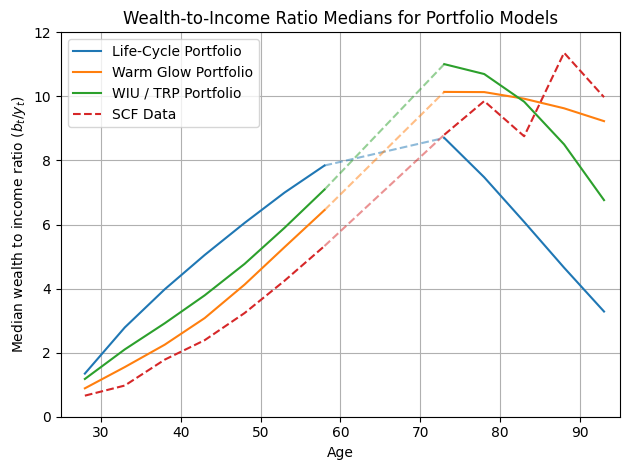

In [12]:
colors = ['tab:blue','tab:orange','tab:green','tab:red']

plt.plot(age_vec_young, portfolio_wealth_moments[:7], '-', color=colors[0], label="Life-Cycle Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], portfolio_wealth_moments[6:8], '--', color=colors[0], alpha=0.5)
plt.plot(age_vec_old, portfolio_wealth_moments[7:], '-', color=colors[0])

plt.plot(age_vec_young, warmglow_wealth_moments[:7], '-', color=colors[1], label="Warm Glow Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], warmglow_wealth_moments[6:8], '--', color=colors[1], alpha=0.5)
plt.plot(age_vec_old, warmglow_wealth_moments[7:], '-', color=colors[1])

plt.plot(age_vec_young, trp_wealth_moments[:7], '-', color=colors[2], label="WIU / TRP Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], trp_wealth_moments[6:8], '--', color=colors[2], alpha=0.5)
plt.plot(age_vec_old, trp_wealth_moments[7:], '-', color=colors[2])

plt.plot(age_vec_young, emp_wealth_moments[:7], '--', color=colors[3], label="SCF Data")
plt.plot([age_vec_young[-1], age_vec_old[0]], emp_wealth_moments[6:8], '--', color=colors[3], alpha=0.5)
plt.plot(age_vec_old, emp_wealth_moments[7:], '--', color=colors[3])

plt.xlabel('Age')
plt.ylabel(r"Median wealth to income ratio ($b_t/y_t$)")
plt.title("Wealth-to-Income Ratio Medians for Portfolio Models")
plt.xlim(25, 95)
plt.ylim(0.0, 12.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("WealthMomentFit", True, True, target_dir="")

Saving figure ShareMomentFit in 


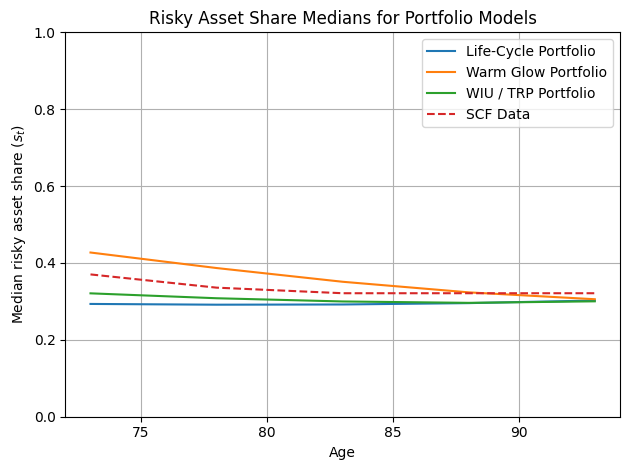

In [13]:
plt.plot(age_vec_old, portfolio_share_moments, '-', color=colors[0], label="Life-Cycle Portfolio")
plt.plot(age_vec_old, warmglow_share_moments, '-', color=colors[1], label="Warm Glow Portfolio")
plt.plot(age_vec_old, trp_share_moments, '-', color=colors[2], label="WIU / TRP Portfolio")
plt.plot(age_vec_old, emp_share_moments, '--', color=colors[3], label="SCF Data")

plt.xlabel('Age')
plt.ylabel(r"Median risky asset share ($s_t$)")
plt.title("Risky Asset Share Medians for Portfolio Models")
plt.xlim(72, 94)
plt.xticks([75,80,85,90])
plt.ylim(0.0, 1.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("ShareMomentFit", True, True, target_dir="")

In [16]:
turn_off_BM_sim_moments = sim_func_warmglow([warmglow_est_params[0], warmglow_est_params[1], warmglow_est_params[2] + 1000.])
turn_off_BM_wealth_moments = convert_wealth_moments_to_vec(turn_off_BM_sim_moments)

In [17]:
turn_off_BM_wealth_moments

array([0.75953956, 1.21207434, 1.69711087, 2.26840459, 2.95873842,
       3.76141233, 4.56567415, 5.43482228, 4.45749882, 3.2760346 ,
       2.10988261, 1.18886769])

Saving figure StrongBequestMotive in 


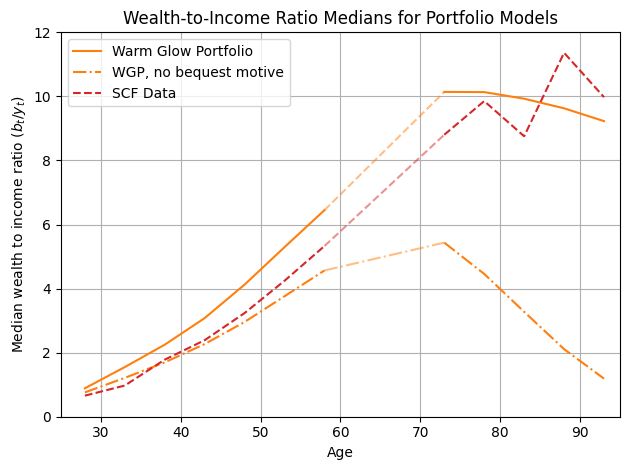

In [21]:
plt.plot(age_vec_young, warmglow_wealth_moments[:7], '-', color=colors[1], label="Warm Glow Portfolio")
plt.plot([age_vec_young[-1], age_vec_old[0]], warmglow_wealth_moments[6:8], '--', color=colors[1], alpha=0.5)
plt.plot(age_vec_old, warmglow_wealth_moments[7:], '-', color=colors[1])

plt.plot(age_vec_young, turn_off_BM_wealth_moments[:7], '-.', color=colors[1], label="WGP, no bequest motive")
plt.plot([age_vec_young[-1], age_vec_old[0]], turn_off_BM_wealth_moments[6:8], '-.', color=colors[1], alpha=0.5)
plt.plot(age_vec_old, turn_off_BM_wealth_moments[7:], '-.', color=colors[1])

plt.plot(age_vec_young, emp_wealth_moments[:7], '--', color=colors[3], label="SCF Data")
plt.plot([age_vec_young[-1], age_vec_old[0]], emp_wealth_moments[6:8], '--', color=colors[3], alpha=0.5)
plt.plot(age_vec_old, emp_wealth_moments[7:], '--', color=colors[3])

plt.xlabel('Age')
plt.ylabel(r"Median wealth to income ratio ($b_t/y_t$)")
plt.title("Wealth-to-Income Ratio Medians for Portfolio Models")
plt.xlim(25, 95)
plt.ylim(0.0, 12.0)
plt.grid()
plt.legend()
plt.tight_layout()
make_figs("StrongBequestMotive", True, True, target_dir="")